Simple perceptron with 2 entries


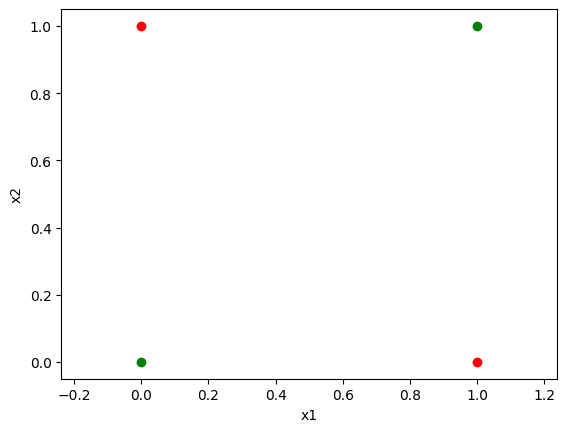

In [6]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import random


# Number of entries
n_e = 2
print("Simple perceptron with " + str(n_e) + " entries")

# Number of values
n_v = 2 # 0 or 1

# Number of epochs
t = 8

# Size of the learning set
n = pow(n_v, n_e)

# Function to learn
y = np.zeros(n)
y2D = np.zeros( (n_e, n_e))

k = 0
x1 = np.zeros(n)
x2 = np.zeros(n)

for i in range(0,n_e):
   for j in range(0,n_v):
      x1[k]=i
      x2[k]=j
      y_s = input("Value for x1=" + str(i) + " and x2=" + str(j) + " (0/1): ")
      y[i * n_e + j] = int(y_s)
      y2D[i, j] = int(y_s)
      k = k+1

for i in range(0,n_e):
   for j in range(0,n_e):
      if (y2D[i,j] == 0):
         plt.scatter(i,j,color="red")
      else:
         plt.scatter(i,j,color="green")	  
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.show()

Initial weights (w1, w2, and theta):
[0.26, 0.14, 0.25]
Final weights (w1, w2, and theta):
[0.26, 0.14, 0.25]


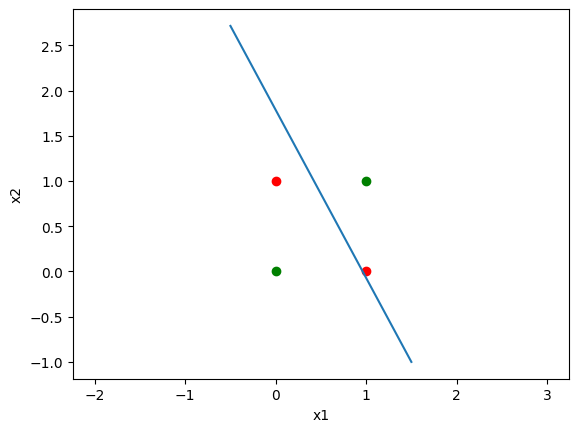

In [7]:
w = [round(random.random(),2) for i in range(n_e + 1)] # +1 for theta
print("Initial weights (w1, w2, and theta):")
print(w)

sum_wx = 0

w1_t = np.zeros(t * n)
w2_t = np.zeros(t * n)
w3_t = np.zeros(t * n)

s = 0


for k in range(0, t):
  for i in range(0, n):
    w1_t[s] = w[0]
    w2_t[s] = w[1]
    w3_t[s] = w[2]
    sum_wx = round(w[0] * x1[i] + w[1] * x2[i] - w[2], 2)
    if (sum_wx >= 0):
      if (y[i] != 1): # SUB
        w[0] = w[0] - x1[i]
        w[1] = w[1] - x2[i]
        w[2] = w[2] + 1
    if (sum_wx < 0):
      if (y[i] == 1): # ADD
        w[0] = w[0] + x1[i]
        w[1] = w[1] + x2[i]
        w[2] = w[2] - 1
    s = s+1

# for k in range(0, t - 1):
#   for i in range(0, 4):
#     w1_t[s] = w[0]
#     w2_t[s] = w[1]
#     w3_t[s] = w[2]
#     sum_wx = round(w[0] * x1[i] + w[1] * x2[i] - w[2], 2)
#     if (sum_wx >= 0):
#       if (y[i] == 1):
#         print("OK: TEST " + str(sum_wx) + ">=0")
#       else:
#         print("SUB: " + str(sum_wx) + "<0")
#         w[0] = w[0] - x1[i]
#         w[1] = w[1] - x2[i]
#         w[2] = w[2] + 1
#     if (sum_wx < 0):
#       if (y[i] == 1):
#         print("ADD: " + str(sum_wx) + ">=0")
#         w[0] = w[0] + x1[i]
#         w[1] = w[1] + x2[i]
#         w[2] = w[2] - 1
#       else:
#         print("OK: TEST " + str(sum_wx) + "<0")
#     s = s+1

for i in range(0, n_e + 1):
  w[i] = round(w[i],2)


print("Final weights (w1, w2, and theta):")
print(w)

if (w[1] == 0):
  w[1] = 0.01
if (w[0] == 0):
  w[0] = 0.01
  
a = - w[0] / w[1] 
b = w[2] / w[1]

x = np.linspace(-0.5, 1.5, 2000)
l1 = (a * x + b)

plt.figure()
plt.plot(x, l1)
plt.axis('equal')
plt.xlabel("x1")
plt.ylabel("x2")


for i in range(0,n_e):
   for j in range(0,n_e):
      # print(str(y2D[i,j]))
      if (y2D[i,j] == 0):
         plt.scatter(i,j,color="red")
      else:
         plt.scatter(i,j,color="green")	  

plt.show()


Learning process failure


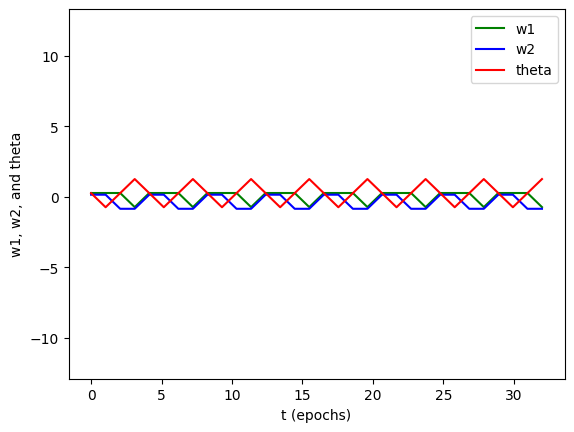

In [8]:
itsworking = True
for i in range(0,n):
  sum_wx = w[0] * x1[i] + w[1] * x2[i] - w[2]
#  print(str(i) + ": " + "Sum:" + str(sum_wx) + " and y=" + str(y[i]))
  if (sum_wx >= 0):
    if (y[i] == 0):
      itsworking = False
  if (sum_wx < 0):
    if (y[i] == 1):
      itsworking = False

if itsworking:
  print("Success of the learning process")
else:
  print("Learning process failure")

# print(w1_t)
# print(w2_t)
# print(w3_t)

x = np.linspace(0, t*4, t*4)
plt.figure()
plt.plot(x, w1_t, "green", label="w1")
plt.plot(x, w2_t, "blue", label="w2")
plt.plot(x, w3_t, "red", label="theta")
plt.axis('equal')
plt.xlabel("t (epochs)")
plt.ylabel("w1, w2, and theta")
plt.legend()
plt.show()